In [1]:
from tensorflow import keras

# 데이터 삽입
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# history를 담아보자
# vervose=0 으로 지정해주면 훈련과정을 나타내지 않는다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=1)
print(history.history.keys())
# loss와 accuracy가 포함되어 있다.

Epoch 1/5


2022-05-16 10:35:20.174453: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 564us/step - loss: 0.5243 - accuracy: 0.8171
Epoch 2/5
1500/1500 [==============================] - 1s 630us/step - loss: 0.3950 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 1s 576us/step - loss: 0.3556 - accuracy: 0.8708
Epoch 4/5
1500/1500 [==============================] - 1s 581us/step - loss: 0.3267 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 1s 567us/step - loss: 0.3102 - accuracy: 0.8857
dict_keys(['loss', 'accuracy'])


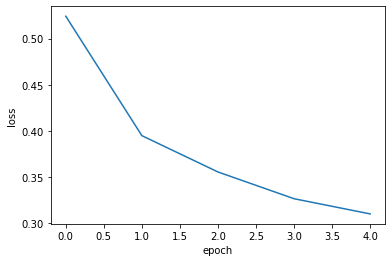

In [5]:
# loss를 그래프로 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

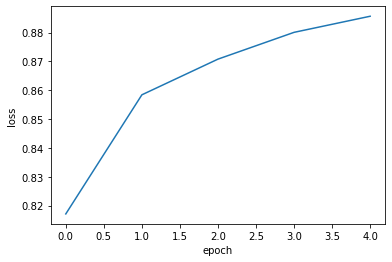

In [6]:
# accuracy를 그래프로 출력
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## epoch를 20으로 올려서 그래프를 그려보자

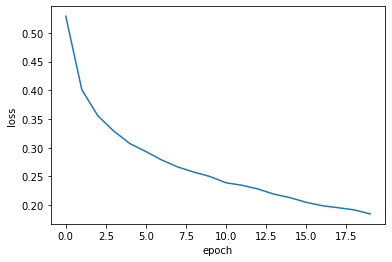

In [7]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 맞다 과대적합.
이번에는 훈련세트와 더불어서 검증세트도 함께 출력해보자

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [9]:
# history에 담긴 값은?
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


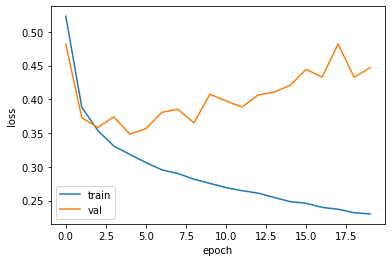

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## Adam 옵티마이저를 사용해서 다시 출력해보자

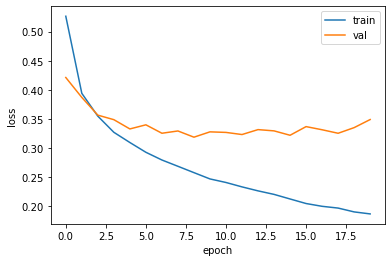

In [11]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 검증세트의 loss가 증가하지 않고 유지되는 것을 확인할 수 있다.

## 신경망의 대표적 규제방법, 드롭아웃

In [12]:
# 드롭아웃 은닉층은 랜덤하게 뉴런을 드롭아웃해서 과대적합을 막는다.
# 드롭아웃 은닉층을 추가해보자
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


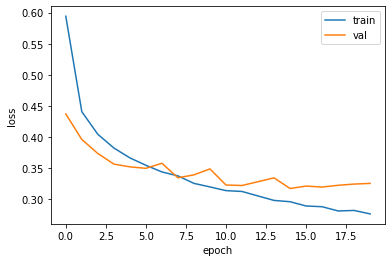

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 드롭아웃을 통해 조금 더 정확한 예측이 가능해졌지만, 가장 좋은 에포크는 10이라는 것을 알 수 있다.

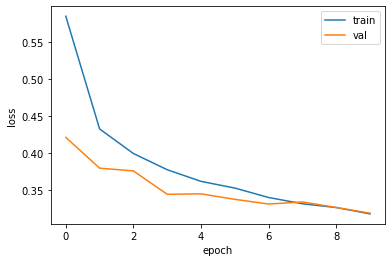

In [14]:
# 에포크를 10으로 줘서 다시 학습을 시켜보자
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 모델 저장

In [15]:
# 훈련한 모델의 파라미터를 저장하는 save_weights() 메서드
model.save_weights('model-weights.h5')

# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드
model.save('model-whole.h5')